### Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,precision_score, recall_score, f1_score

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
### missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


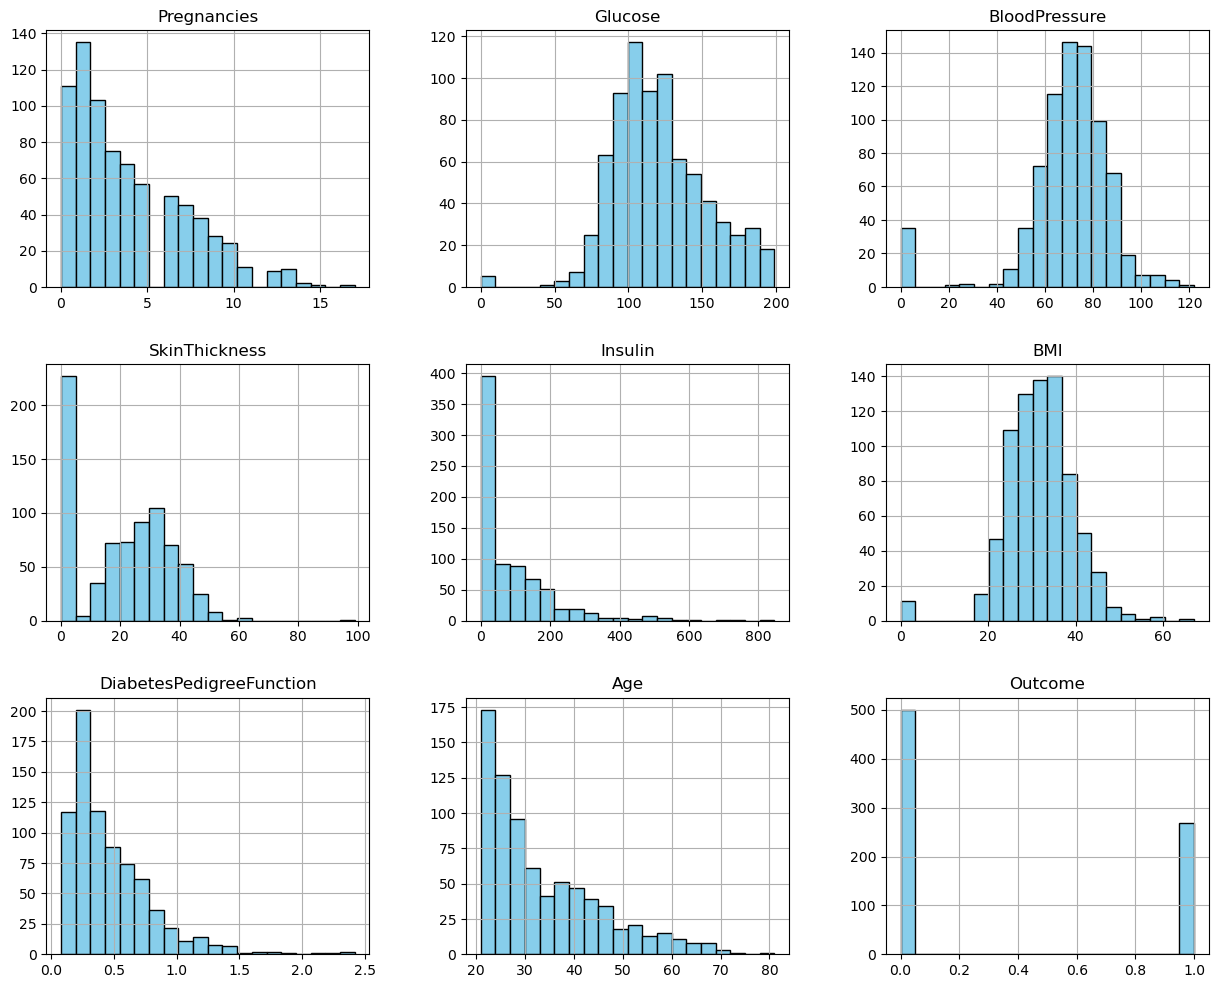

In [9]:
### to visualize the distributions
df.hist(figsize=(15, 12), bins=20, color='skyblue', edgecolor='black')
plt.show()

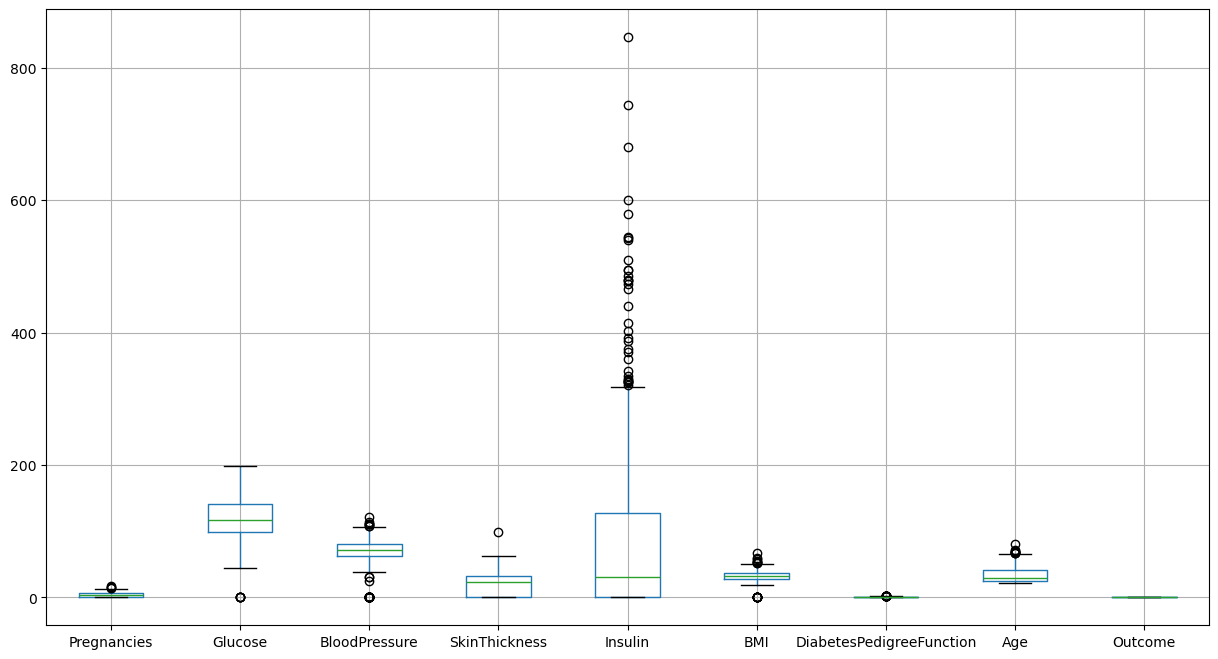

In [10]:
### outliers
plt.figure(figsize=(15, 8))
df.boxplot()
plt.show()

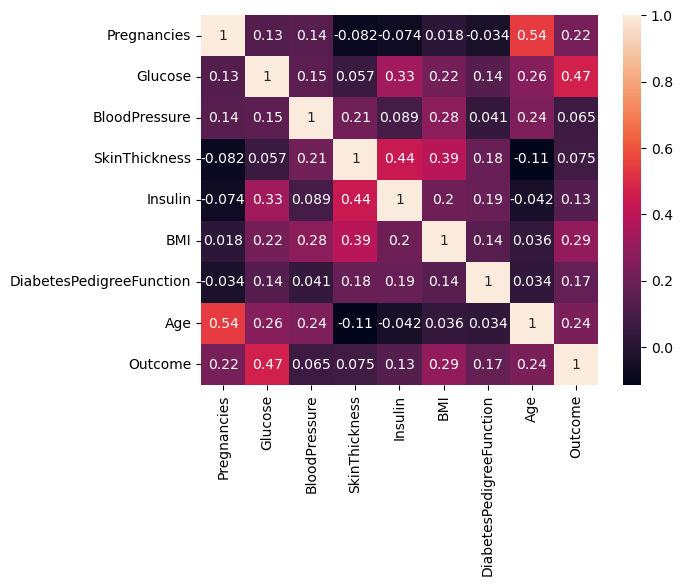

In [11]:
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [12]:
target=df[['Outcome']]
features=df.drop(columns=['Outcome'])

In [13]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576, 1)
(192, 1)


In [14]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [15]:
log_model.coef_

array([[ 1.04752433e-01,  3.19788933e-02, -1.52969688e-02,
        -7.50420415e-04, -9.32647682e-04,  7.41389149e-02,
         1.94301555e+00,  1.74811530e-02]])

In [16]:
log_model.intercept_

array([-7.74157926])

In [17]:
y_pred=log_model.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [18]:
accuracy_score(y_test,y_pred)

0.7447916666666666

In [19]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [20]:
precision

0.6428571428571429

In [21]:
recall

0.5538461538461539

In [22]:
f1

0.5950413223140496

In [23]:
### sigmoid values
sigmoid=log_model.predict_proba(x_test)[:,1]
sigmoid

array([0.23864489, 0.07572074, 0.59129738, 0.15827623, 0.4558784 ,
       0.70130531, 0.96936923, 0.16580642, 0.89305989, 0.2600126 ,
       0.08255695, 0.88259228, 0.64859026, 0.39411254, 0.68300524,
       0.33356519, 0.138011  , 0.27098514, 0.50392813, 0.17125684,
       0.2097429 , 0.02507827, 0.52798865, 0.97219614, 0.2453805 ,
       0.79534187, 0.45199917, 0.33722664, 0.52259534, 0.5340261 ,
       0.06648488, 0.94639357, 0.31286969, 0.62331069, 0.36345037,
       0.3974478 , 0.92615887, 0.0425097 , 0.1541326 , 0.26883811,
       0.34548281, 0.82064889, 0.47225699, 0.11542374, 0.24622256,
       0.86777757, 0.09279671, 0.17813439, 0.84052112, 0.8316072 ,
       0.10005414, 0.06841077, 0.33386634, 0.752799  , 0.71899078,
       0.90856243, 0.16920068, 0.08128489, 0.75828451, 0.14622625,
       0.1824086 , 0.1909847 , 0.33390819, 0.35588073, 0.49310365,
       0.33765351, 0.2007803 , 0.03706847, 0.26891736, 0.03815542,
       0.06058279, 0.61854635, 0.11248536, 0.23120209, 0.20753

In [24]:
auc_score=roc_auc_score(y_test,sigmoid)
auc_score

0.7764990914597215

In [25]:
roc_curve(y_test,sigmoid)

(array([0.        , 0.00787402, 0.00787402, 0.01574803, 0.01574803,
        0.02362205, 0.02362205, 0.03937008, 0.03937008, 0.04724409,
        0.04724409, 0.05511811, 0.05511811, 0.06299213, 0.06299213,
        0.08661417, 0.08661417, 0.1023622 , 0.1023622 , 0.11811024,
        0.11811024, 0.12598425, 0.12598425, 0.13385827, 0.13385827,
        0.14173228, 0.14173228, 0.15748031, 0.15748031, 0.18110236,
        0.18110236, 0.21259843, 0.21259843, 0.26771654, 0.26771654,
        0.29133858, 0.29133858, 0.30708661, 0.30708661, 0.32283465,
        0.32283465, 0.33858268, 0.33858268, 0.34645669, 0.34645669,
        0.35433071, 0.35433071, 0.36220472, 0.36220472, 0.37795276,
        0.37795276, 0.39370079, 0.39370079, 0.47244094, 0.47244094,
        0.51968504, 0.51968504, 0.55905512, 0.55905512, 0.56692913,
        0.56692913, 0.58267717, 0.58267717, 0.61417323, 0.61417323,
        0.67716535, 0.67716535, 0.70866142, 0.70866142, 0.72440945,
        0.72440945, 0.83464567, 0.83464567, 1.  

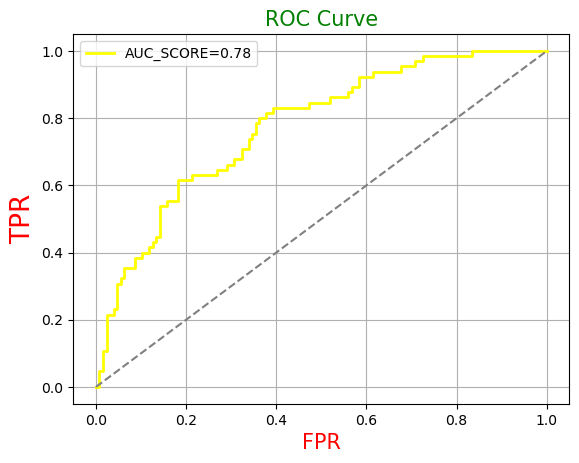

In [26]:
fpr,tpr,thr=roc_curve(y_test,sigmoid)
plt.plot(fpr,tpr,color='yellow',linewidth=2,label=f'AUC_SCORE={auc_score:.2f}')
plt.plot([0,1],linestyle='--',color='grey')
plt.xlabel('FPR',size=15,color='red')
plt.ylabel('TPR',size=19,color='red')
plt.title('ROC Curve',color='green',size=15)
plt.legend()
plt.grid()
plt.show()

In [27]:
### The most influential feature is clearly DiabetesPedigreeFunction, followed by BMI, Pregnancies, and Glucose. BloodPressure, SkinThickness, and Insulin have minimal effect in this dataset.

In [28]:
import streamlit as st
import pickle

In [29]:
file='log.pkl'

In [30]:
pickle.dump(log_model,open(file,'wb'))

In [1]:
### difference between precision and recall
### precision and recall are two metrics used to evaluate the performance of your model
### Precision measures how many of the predicted positive cases are actually positive whereas Recall measures how many of the actual positive cases were correctly predicted 

In [ ]:
### cross validation 
### Cross-validation is a technique to evaluate the performance of a machine learning model more reliably, instead of just testing it on a single train-test split.
### it is important because it reduces overfitting,better performance estimate,it handles imbalanced classes,helps compare multiple models or hyperparameters without overfitting to a single split.